In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats

In [2]:
def plot_dist(dist, xmin, xmax, ax):
    x = np.linspace(xmin, xmax, 1000)
    y = dist.pdf(x)
    ax.plot(x,y)
    ax.set_ylim(0,y.max() + y.max()/4.0)

# Chapter 2 - Probability

This chapter introduces probability theory (and the differences between frequentists and baysians), some common statistics and examples of discrete and continous distributions. It also presents transformation of variables, monte carlo methods and information theory.

## Rules of probability

### Sum rule
The probability of the conjunction of two events (or assertions) is given by: 

$$p(A\ or\ B) = p(A) + p(B) - p(A\ and\ B)$$

### Product rule
The probability of the event $A$ and $B$ is given by:

$$p(A\ and\ B) = p(A|B)p(B)$$ 

### Conditional
The probability of the event $A$ given that the event $B$ is true is given by:


$$p(A|B) = \frac{p(A\ and\ B)}{p(B)}$$

### Bayes rule
The Bayes rule is:

$$p(X|Y) = \frac{p(X)p(Y|X)}{p(Y)}$$

This can be derived from the sum and the product rule

## Independence

The events $A$ and $B$ are independent if:
    
$$p(A\ and\ B) = p(A)p(B)$$

Note that this is basically the product rule, with the condition that $p(A|B) = p(A)$.

## Continuous random variables

To deal with continuous random variables we define $F(x) = p(X\leq x)$. This means that:

$$p(a < X \leq b) = F(b) - F(a)$$

## Common Statistics

### Quantiles

The $\alpha$ quantile of a cdf $F$, denoted $F^{-1}(\alpha)$, is the value $x_\alpha$ such that

$$F(x_\alpha) = P(X \leq x_\alpha) = \alpha$$

The value $F^{-1}(0.5)$ is the **median** of the distribution.

### Mean

The **mean** or **expected value** of a discrete distribution, commonly denoted by $\mu$, is defined as

$$\mathbb{E}[X] = \sum_{x\in\mathcal{X}}x~p(x)$$

Whereas for a continuous distribution, the mean is defined as

$$\mathbb{E}[X] = \int_{\mathcal{X}}x~p(x)$$

### Variance

The **variance**, denoted by $\sigma^2$, is measure of the "spread" of a distribution, defined as

$$\sigma^2 = \mathrm{var}[X] = \mathbb{E}{(X-\mu)^2}$$

where $\mu = \mathbb{E}[X]$. A useful result is

$$\mathbb{E}[X^2] = \sigma^2 + \mu^2$$

The **standard deviation** is defined as $\mathrm{std}[X] = \sqrt{\sigma^2} = \sigma$

### Covariance  and correlation

The **covariance** between two random variable measures the degree which they are linearly related

$$\mathrm{cov}[X, Y] = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])] = \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y]$$

If $\mathbf{x}$ is a d-dimensional vector, it covariance matrix is given by:

$$\mathrm{cov}[\mathbf{x}] = \mathbb{E}\left[(X - \mathbb{E}[X])(X - \mathbb{E}[X])\right] = $$

$$= \begin{bmatrix}\mathrm{var}[X_1] & \mathrm{cov}[X_1, X_2] & \dots & \mathrm{cov}[X_1, X_d] \\
                   \mathrm{cov}[X_2, X_1] & \mathrm{var}[X_2] & \dots & \mathrm{cov}[X_2, X_d] \\
                   \vdots            & \vdots                 & \ddots & \vdots                 \\
                   \mathrm{cov}[X_d, X_1] & \mathrm{cov}[X_1, X_2] & \dots & \mathrm{var}[X_d] \\
\end{bmatrix}$$

The **Pearson correlation coefficient** between two random variables $X$ and $Y$ is given by:

$$\mathrm{corr}\left[X, Y\right] = \frac{\mathrm{cov}\left[X, Y\right]}{\sqrt{\mathrm{var}[X]\mathrm{var}[Y]}}$$

## Common discrete distributions

* Bernoulli:

$$\mathrm{Ber}(x~|~\theta) =
    \left\{
    \begin{array}{ll}
		\theta  & \mbox{if } x = 1 \\
		1-\theta & \mbox{if } x = 0
	\end{array}
    \right.
$$

 

* Binomial:

$$\mathrm{Bin}(k~|~n,\theta) = \binom{n}{k}\theta^k(1-\theta)^{n-k}$$

* Multinomial:

$$\mathrm{Mu}(x~|~n,\theta) = \binom{n}{x_1,...,x_K}\prod_{j=1}^{K}\theta_{j}^{x_j}$$

the **multinomial coeffiecient** is defined as

$$\binom{n}{x_1,...,x_K} = \frac{n!}{x_1! \dots x_K!}$$

* Poisson

$$\mathrm{Poi}(x~|~\lambda) = e^{-\lambda}\frac{\lambda^x}{x!}$$

* Empirical distribution

Given a dataset $\mathcal{D} = \{x_1, \dots, x_N\}$, the empirical distribution is defined as

$$p_{\mathrm{emp}}(A) = \frac{1}{N}\sum_{i=1}^{N}w_i \delta_{x_i}(A)$$

where $0\leq w_i \leq 1$ and $\sum w_i = 1$

## Common continuous distributions

* Normal
$$ P(x~|~\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}~e^{-\frac{1}{2\sigma^2}(x-\mu)^2} $$


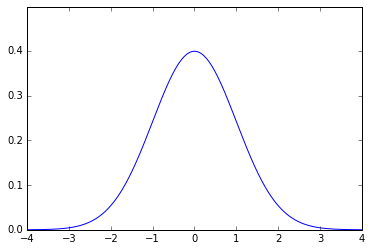

In [7]:
ax = plt.subplot(111)
plot_dist(stats.norm, -4, 4, ax)

* Laplace
$$ P(x~|~\mu, b) = \frac{1}{2b}~\exp\left(-\frac{|x-\mu|}{b}\right)$$

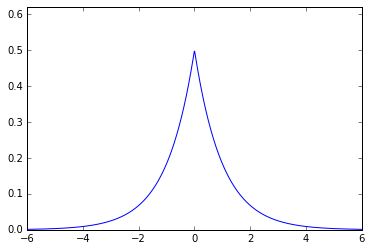

In [9]:
ax = plt.subplot(111)
plot_dist(stats.laplace, -6, 6, ax)

* Gamma
$$ P(T~|~\text{shape}=a,\text{rate}=b) = \frac{b^a}{\Gamma(a)}~T^{a-1}e^{-Tb}$$

Where
$$\Gamma(x) = \int_{0}^{\infty}u^{x-1}e^{-u}~\mathrm{d}u$$

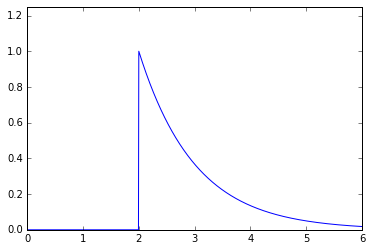

In [12]:
ax = plt.subplot(111)
plot_dist(stats.gamma(1,2), 0, 6, ax)

* Exponential
$$P(x~|~\lambda) = \lambda e^{-\lambda x}$$

* Chi-squared

$$P(x~|~\nu) = Gamma\left(x~\Bigg|~\frac{\nu}{2}, \frac{1}{2}\right)$$

* Beta
$$P(x~|~a,b) = \frac{1}{B(a,b)}x^{a-1}(1-x)^{b-1}$$

Where
$$B(a,b) = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}$$

* Pareto
$$P(x~|~k,m) = km^kx^{-(k+1)}\mathbb{I}(x\geq m)$$

* Student *t*
$$P(x~|~\nu) = \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right)\sqrt{\nu\pi}}\left(1 + \frac{x^2}{\nu}\right)^{-\frac{\nu + 1}{2}}$$

where $\nu$ is the number of degrees of freedom

## Joint probability distributions

* Multivariate Normal
$$P(\mathbf{x}~|~\mathbf{\mu}, \mathbf{\Sigma}) = \frac{1}{(2\pi)^{D/2} \left|\mathbf{\Sigma}\right|^{1/2}} \exp\left[-\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^\intercal \Sigma^{-1}(\mathbf{x} - \mathbf{\mu})\right]$$

where $\mathbf{\mu} = \mathbb{E}[\mathbf{x}]$ is the mean and $\mathbf{\Sigma} = cov[\mathbf{x}]$ is the covariance matrix.

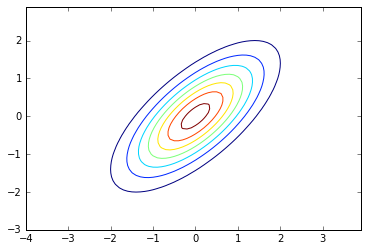

In [17]:
x = np.arange(-4.0, 4.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)
X, Y = np.meshgrid(x, y)
Z = mlab.bivariate_normal(X, Y, sigmaxy=0.7)

plt.contour(X,Y,Z);

* Multivariate Student *t*
$$P(\mathbf{x}~|~\mathbf{\mu}, \mathbf{\Sigma}, \nu) = \frac{\Gamma(\nu/2 + D/2)}{\Gamma(\nu/2)}~\big|\pi \mathbf{V}\big|^{-1/2} \times \left[1 + (\mathbf{\mathbf{x}} - \mathbf{\mu})^\intercal \mathbf{V}^{-1}(\mathbf{\mathbf{x}} - \mathbf{\mu})\right]^{-\frac{\nu+D}{2}}$$

Where $\Sigma$ is called \emph{scale matrix}, $\nu$ is a scalar that controls how fat the tails of the distribution are (the bigger it is, the slimmer are the tails, and the distribution tends to the multivariate normal) and $V = \nu\Sigma$. this distributions has the following properties: $\mu$ is the mean and also the median, and $\frac{\nu}{\nu - 2}\Sigma$.

* Dirichlet
$$P(x~|~\alpha) = \frac{1}{B(\alpha)} \prod_{k=1}^{K} x_k^{\alpha_k - 1} \mathbb{I}(x \in S_k)$$

where $S_k = \left\{x: 0 \leq x_k \leq 1, \sum_{k=1}^{K}  x_k = 1\right\}$ is the support of the distribution and $B(\alpha) = \frac{\prod_{k=1}^{K} \Gamma(\alpha_k)}{\Gamma\left(\sum_{k=1}^{K} \alpha_k\right)}$ is the beta function for N variables.

## Central limit theorem

Consider $N$ idenpendent and identically distributed random varibles with pdf $p(x_i)$ (not necessarily gaussian) with mean $\mu$ and variance $\sigma^2$. Let $S_N = \sum_{i=1}^{N} X_i$ be the sum of these random variable. the central limit theorem states that:

$$P(S_N = s) = \frac{1}{\sqrt{2\pi N\sigma^2}}\exp\left(-\frac{(s - N\mu)^2}{2N\sigma^2}\right)$$

That is, the distribution of

$$Z_N = \frac{S_N - N\mu}{\sigma\sqrt{N}} = \frac{\bar{X} - \mu}{\sigma/\sqrt{N}}$$

where \bar{X} is the empirical mean, converges to the standard normal.

## Transformation of random variables

### Linear tranformations

If $\mathbf{y} = f(\mathbf{x}) = \mathbf{A}\mathbf{x} + \mathbf{b}$ then:

$$\mathbb{E}[\mathbf{y}] = \mathbf{A}\mathbf{\mu} + \mathbf{b}$$
$$\mathrm{cov}[y] = \mathbf{A} \mathbf{\Sigma} \mathbf{A}^\intercal$$

### General tranformations


#### Discrete random variable

If $X$ is a discrete random variable, we can derive the pdf of $y = f(x)$ by summing up the probability mass for all $x$ such that $f(x) = y$:

$$P(y) = \sum_{x:~f(x)=y} P(x)$$

#### Continuous random variable

If X is continuous we work with the cdf and do instead:

$$P_y(y) = P_y(f(X) \leq y) = P_y(X \leq f^{-1}(y)) = P_y(f^{-1}(y))$$

Taking the derivatives we get:

$$p_y(y) = p_x(x) \left|\frac{dx}{dy}\right|$$

#### Multivariate transformation

If $X$ is a multivariate continuous random variable we get:

$$p_y(y) = p_x(x) \left|\mathrm{det} ~ \mathbf{J}_{\mathbf{y} \rightarrow \mathbf{x}}\right|$$

Where $\mathbf{J}$ is the jacobian matrix.

## Monte Carlo Methods

## Information Theory

### Entropy

### KL divergence

### Mutual information